# Feature Selection and Backward Elimination




## Task :

### Various Features Are Given Of The Startups And We Have To Predict The Profit.
#### Link of the Dataset :- https://www.kaggle.com/karthickveerakumar/startup-logistic-regression

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import linear_model
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [181]:
df = pd.read_csv('startups.csv')
df.head(8)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60


### Check Missing Data 

In [182]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### Data Visualization

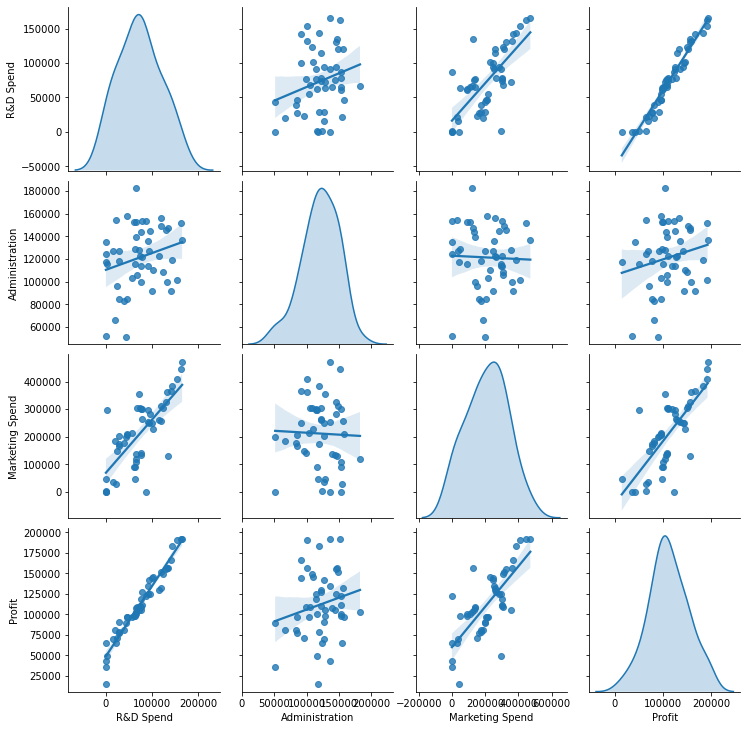

In [183]:

sns.pairplot(df, kind='reg', diag_kind='kde')


### Spilitting The Data

In [184]:
x = df.iloc[:,:4].values
y = df.loc[:, 'Profit'].values
print('features = ', x)
print('\ntarget = ', y)

features =  [[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Flori

### Appliying OneHotEncoding
#### Using ColumnTransformer on state column

In [185]:

transformer = ColumnTransformer(transformers = [("asda",OneHotEncoder(),[3])],remainder = 'passthrough')

x = transformer.fit_transform(x)
x

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

### Avoiding Dummy variable trap
#### For more info :- https://www.geeksforgeeks.org/ml-dummy-variable-trap-in-regression-models/

In [186]:
x = x[:,1:]
x

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [0.0, 1.0, 86419.7

### Splitting the data into test and training data

In [187]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


### Normalization of Data
#### using StandardScaler

In [188]:
scalar = StandardScaler()
x_train[:,3:] = scalar.fit_transform(x_train[:,3:]) 
x_test[:,3:] =scalar.fit_transform(x_test[:,3:])

### Applying simple Linear Regression

In [189]:
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
bscr = model.score(x_test,y_test)
print(bscr)

0.9254495549047351


## Adding the Dummy Feature

The equation of our line (or rather, plane) is y=b+m1.x1+m2.x2+m3.x3+m4.x4.

When we make a linear model with sklearn, the bias term ‘b’ is calculated separately. However, for performing Backward elimination, we are required to use the linear model provided by statsmodels library — which does not consider the bias term. Hence, by adding a dummy feature with value as ‘1’, 

our equation becomes y=b.x0+m1.x1+m2.x2+m3.x3+m4.x4 where x0 = 1.

In [190]:
x = np.append(np.ones((x.shape[0],1),dtype=np.int), values = x, axis=1)
x

array([[1, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [1, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [1, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [1, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [1, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [1, 0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1, 1.0, 0.0, 9

## Using OLS for Backward Elimination 

In [191]:
import statsmodels.api as sm
x_opt = np.array(x[:, [0, 1, 2, 3, 4, 5]], dtype=float)
regressor = sm.OLS(y, x_opt).fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 21 Aug 2020   Prob (F-statistic):           1.34e-27
Time:                        11:01:31   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [192]:
x_opt = np.array(x[:, [0, 1, 3, 4, 5]], dtype=float)
regressor = sm.OLS(y, x_opt).fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fri, 21 Aug 2020   Prob (F-statistic):           8.49e-29
Time:                        11:01:31   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [193]:
x_opt = np.array(x[:, [0, 3, 4, 5]], dtype=float)
regressor = sm.OLS(y, x_opt).fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 21 Aug 2020   Prob (F-statistic):           4.53e-30
Time:                        11:01:31   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [194]:
x_opt = np.array(x[:, [0, 3, 5]], dtype=float)
regressor = sm.OLS(y, x_opt).fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 21 Aug 2020   Prob (F-statistic):           2.16e-31
Time:                        11:01:31   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [195]:
x_opt = np.array(x[:, [0, 3]], dtype=float)
regressor = sm.OLS(y, x_opt).fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 21 Aug 2020   Prob (F-statistic):           3.50e-32
Time:                        11:01:31   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Final Features 

Now we see that all features are below our significance level, which means we can no longer eliminate features.

The first 3 features x1,x2 and x3 are binary variables for the feature ‘State’ after One-Hot encoding. 

Hence, we’re essentially left with 1 features — R&D Spend. 

With these features, we’ll now create a Linear Model with Sklearn and test its score

In [198]:
#spliting the data into training and test 
x_opt = np.array(x[:, [3]], dtype=float)
x_train, x_test, y_train, y_test = train_test_split(x_opt, y, test_size = 0.2, random_state = 0)

# train the linear reggression model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
scr = model.score(x_test,y_test)

print('Score before Backward Elimination :', bscr)
print('\nFinal Score after Backward Elimination :', scr)


Score before Backward Elimination : 0.9254495549047351

Final Score after Backward Elimination : 0.9464587607787219
